In [95]:
import numpy as np
import matplotlib.pyplot as plt

import csv
import random
from time import sleep

In [203]:
def getPrices(ticker):
    closeIdx = 0
    firstRow = True
    firstDate = True
    prices = []
    dates = []
    
    with open('individual_stocks_5yr/' + ticker + '_data.csv', newline='\n') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if(firstRow):
                for i, col in enumerate(row):
                    if(col == 'close'):
                        closeIdx = i
                        firstRow = False
                        continue;
            else:
                dates.append(row[0])
                prices.append(float(row[closeIdx]))
    return dates, prices

In [204]:
_, amgnPrices = getPrices("AMGN")

2013-02-08


In [36]:
xAxis = np.arange(len(amgnPrices))
amgn = np.array(amgnPrices)

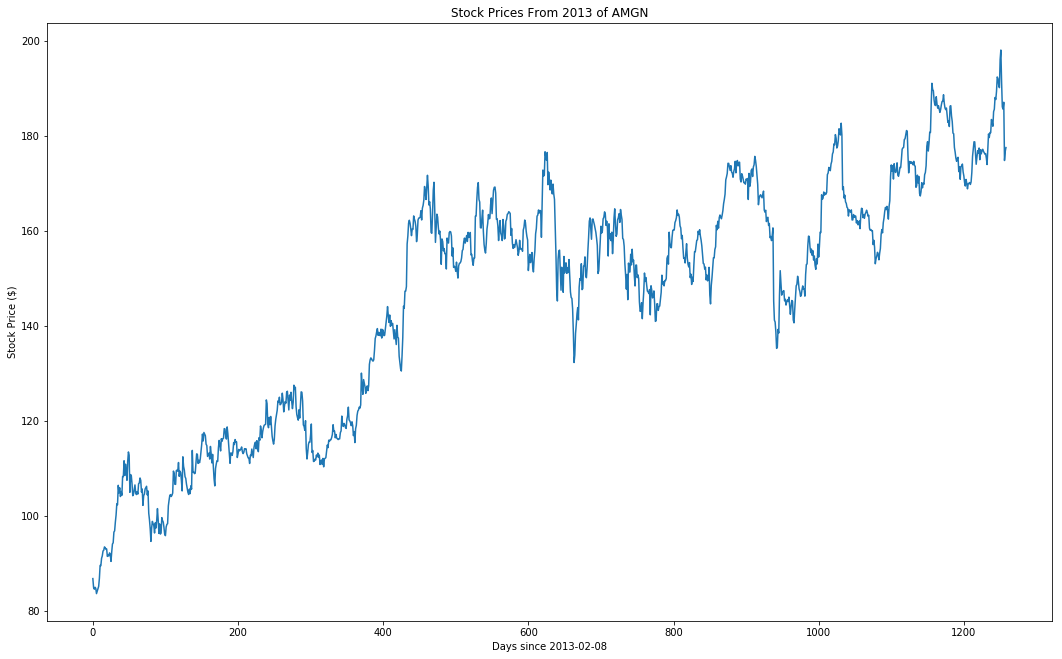

In [54]:
plt.figure(figsize=(18,11))
plt.title("Stock Prices of AMGN from 2013 to 2018")
plt.ylabel("Stock Price ($)")
plt.xlabel("Days since 2013-02-08")
plt.plot(xAxis, amgn)

In [208]:
def runCompetition(stockName):
    printStart()
    
    dates, amgnPrices = getPrices(stockName)
    
    stocks = 0
    money = 0
    endDate = -random.randint(5,250)
    continuousErrorCt = 0
    maxErrorCt = 3
    currYear = getYear(dates[0])
    
    for i, price in enumerate(amgnPrices[:endDate]):
        
        decision = decideToBuyOrSell(price)
        
        if(decision.lower() == 'buy'):
            if(stocks == 1):
                if(continuousErrorCt < maxErrorCt):
                    print("You can't buy, you are already holding")
                elif (continuousErrorCt == maxErrorCt):
                    print("You have continued to make invalid purchases, muted until valid transcation made")
                continuousErrorCt += 1
            else:
                print("You bought " + stockName + " stock priced at " + str(price) + " on " + dates[i] + ".")
                stocks += 1
                money -= price
                continuousErrorCt = 0
                sleep(0.1)
            
        elif(decision.lower() == 'sell'):
            if(stocks == -1):
                if(continuousErrorCt < maxErrorCt):
                    print("You can't sell, you are already shorting")
                elif (continuousErrorCt == maxErrorCt):
                    print("You have continued to make invalid purchases, muted until valid transcation made")
                continuousErrorCt += 1
            else:
                print("You sold " + stockName + " stock priced at " + str(price) + " on " + dates[i] + ".")
                stocks -= 1
                money += price
                continuousErrorCt = 0
                sleep(0.1)
        else:
            # print("Nothing done")
            pass
        
        nextYear = getYear(dates[i+1])
        if(currYear != nextYear):
            for i in range(5):
                print('.', end ='')
                sleep(0.5)
            print("... It is now the year " + nextYear)
            currYear = nextYear
    
    return money + (stocks * amgnPrices[endDate])

def printStart():
    print("================================================================================")
    print("================================================================================")
    print("=======                                                                 ========")
    print("===== Welcoming to the Coding Competition. Your trading will commence now! =====")
    print("===== Good luck!! You will start with $0 and 0 stocks of AMGN. Make money! =====")
    print("=======                                                                  =======")
    print("================================================================================")
    print("================================================================================")
    print()
    sleep(5)

def printResult(gains):
    print("You ended with $" + str(gains))
    
def getYear(date):
    return date[:4]
    
def main():
    totalGains = runCompetition("AMGN")
    printResult(totalGains)

In [209]:
def decideToBuyOrSell(price):
    if(random.randint(0,100) % 4 == 1):
        return 'buy'
    elif(random.randint(0,100) % 25 == 0):
        return 'sell'
    return ''

In [210]:
main()

=======                                                                 ========
===== Welcoming to the Coding Competition. Your trading will commence now! =====
===== Good luck!! You will start with $0 and 0 stocks of AMGN. Make money! =====
=======                                                                  =======

2013-02-08
You bought AMGN stock priced at 84.65 on 2013-02-20.
You sold AMGN stock priced at 85.13 on 2013-02-21.
You bought AMGN stock priced at 89.47 on 2013-02-26.
You can't buy, you are already holding
You can't buy, you are already holding
You can't buy, you are already holding
You have continued to make invalid purchases, muted until valid transcation made
You sold AMGN stock priced at 104.81 on 2013-04-03.
You bought AMGN stock priced at 105.88 on 2013-04-04.
You can't buy, you are already holding
You can't buy, you are already holding
You sold AMGN stock priced at 113.42 on 2013-04-22.
You bought AMGN stock priced at 112.76 on 2013-04-23.
You can't buy, you 

You can't buy, you are already holding
You sold AMGN stock priced at 147.06 on 2016-11-15.
You bought AMGN stock priced at 146.0 on 2016-11-29.
You can't buy, you are already holding
You can't buy, you are already holding
You can't buy, you are already holding
You have continued to make invalid purchases, muted until valid transcation made
You sold AMGN stock priced at 146.21 on 2016-12-30.
........ It is now the year 2017
You bought AMGN stock priced at 150.73 on 2017-01-03.
You can't buy, you are already holding
You can't buy, you are already holding
You can't buy, you are already holding
You sold AMGN stock priced at 154.1 on 2017-01-25.
You bought AMGN stock priced at 152.98 on 2017-01-26.
You can't buy, you are already holding
You can't buy, you are already holding
You can't buy, you are already holding
You have continued to make invalid purchases, muted until valid transcation made
You sold AMGN stock priced at 181.44 on 2017-03-10.
You bought AMGN stock priced at 169.24 on 2017-